# Trabalho 01 - Aprendizado de Máquina
## Aluno: Ruan Felipe de Almeida Silva - 397048

In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn import linear_model

### Importando os dados do dataset

In [52]:
dataframe = pd.read_csv('beans.csv')
dataframe

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


### Analisando os tipos de dados do dataset

In [53]:
dataframe.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

### Verificando se existem dados nulos ou inválidos no dataset

In [54]:
dataframe.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### Separando as features das classes e exibindo a quantidade desses conjuntos

In [55]:
X = dataframe.drop('Class', axis=1)
y = dataframe['Class']
print(X.shape)
print(y.shape)

(13611, 16)
(13611,)


### Exibindo a quantidade de amostras de cada uma das classes de grãos

In [56]:
y.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

### Exibindo a porcentagem de amostras de cada uma das classes de grãos

In [57]:
y.value_counts(normalize=True)

DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: Class, dtype: float64

### Separando os conjuntos em 75% para treino e 25% para teste

In [58]:
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=142, stratify=y)
print("Conjunto x de treino:", len(X_train))
print("Conjunto x de teste:", len(X_test))
print("Conjunto y de treino:", len(y_train))
print("Conjunto y de teste:", len(y_test))

Conjunto x de treino: 10208
Conjunto x de teste: 3403
Conjunto y de treino: 10208
Conjunto y de teste: 3403


### Normalizando os valores das features do conjunto de treino e do conjunto de teste utilizando o MinMaxScaler

In [59]:
norm = preprocessing.MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

### Plotando o histograma do conjunto de treino sem escalonamento

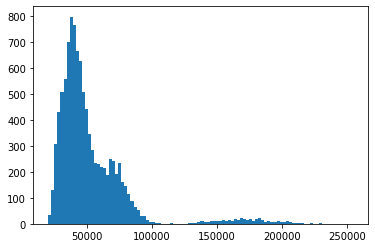

In [60]:
idx = 0
plt.hist(X_train[:, idx], bins=100);

### Plotando o histograma do conjunto de treino normalizado

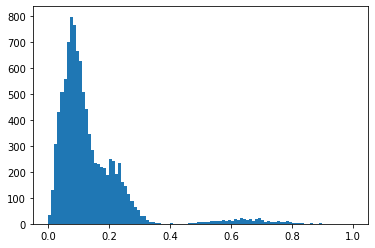

In [61]:
idx = 0
plt.hist(X_train_norm[:, idx], bins=100);

### Padronizando os valores das features do conjunto de treino e do conjunto de teste utilizando o StandardScaler

In [62]:
std = preprocessing.StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

### Plotando o histograma do conjunto de treino sem escalonamento

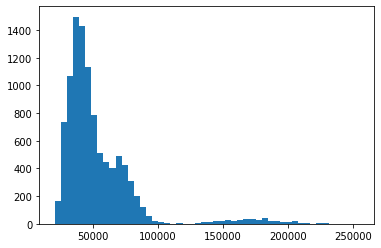

In [63]:
idx = 0
plt.hist(X_train[:, idx], bins=50);

### Plotando o histograma do conjunto de teste padronizado

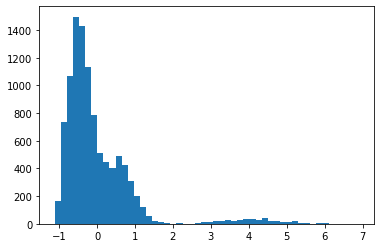

In [64]:
idx = 0
plt.hist(X_train_std[:, idx], bins=50);

### Instanciando modelos de classificadores que serão utilizados abaixo nesse problema de classificação de grãos.

#### Modelos Utilizados: 
* DecisionTreeClassifier
* SVC
* Naive Bayes
* Random Forest
* SGDClassifier 



In [65]:
novos_modelos = {}
novos_modelos['DTC'] = { 'model': tree.DecisionTreeClassifier() }
novos_modelos['SVC'] = { 'model': svm.SVC() }
novos_modelos['NB'] = { 'model':  naive_bayes.GaussianNB() }
novos_modelos['RF'] = { 'model': ensemble.RandomForestClassifier() }
novos_modelos['SGD'] = {'model': linear_model.SGDClassifier()}

### Criando diferentes modelos com o kNN Classificador utilizando diferentes valores de k e os conjuntos sem escalonamento, normalizado e padronizado.

### Os outros modelos utilizados também são instanciados e treinados e os valores preditos do conjunto de teste são exibidos

### Os resultados das métricas obtidas em cada modelo são armazenados em um dicionário e cada um desses dicionários é adicionado a uma lista com os resultados dos modelos testados.

In [66]:
array_k = np.arange(1,11)
scalers = ['No Scaler', 'Normalized', 'Standardized']

results_knn = []
results_otherModels = []

for scaler in scalers:
    if scaler == 'No Scaler':
        X_treino = X_train
        X_teste = X_test
    elif scaler == 'Normalized':
        X_treino = X_train_norm
        X_teste = X_test_norm
    elif scaler == 'Standardized':
        X_treino = X_train_std
        X_teste = X_test_std

    for k in array_k:

        knn = KNeighborsClassifier(n_neighbors=k)    
        knn.fit(X_treino, y_train)
        y_pred = knn.predict(X_teste)
        print("Escalonamento: " + scaler)
        print(f'kNN: Predições para k = {k}:  {y_pred}')
        test_accuracy = metrics.accuracy_score(y_test, y_pred)
        train_accuracy = knn.score(X_treino, y_train)
        precision = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1measure = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
        print('Acurácia: {:.5f}'.format(test_accuracy))

        resultado = {'Model':f'kNN(k = {k})', 'Scaler':scaler, 'Train accuracy':train_accuracy, 'Test accuracy':test_accuracy, 'Precision':precision, 'Recall':recall, 'F1-Measure':f1measure}

        results_knn.append(resultado)
        print("\n---------------------------------------------------------------------------------\n")

    for key in novos_modelos:
        modelo = novos_modelos[key]['model']
        modelo.fit(X_treino, y_train)
        y_pred = modelo.predict(X_teste);
        print("Escalonamento: " + scaler)    
        print(f'Modelo = {key}:  {y_pred}') 
        y_pred = np.array(y_pred)
        test_accuracy = metrics.accuracy_score(y_test, y_pred)
        train_accuracy = modelo.score(X_treino, y_train)
        precision = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1measure = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        print('Acurácia: {:.5f}'.format(test_accuracy))

        resultado = {'Model':key, 'Scaler':scaler, 'Train accuracy':train_accuracy, 'Test accuracy':test_accuracy, 'Precision':precision, 'Recall':recall, 'F1-Measure':f1measure}

        results_otherModels.append(resultado)
        print("\n---------------------------------------------------------------------------------\n")
 

Escalonamento: No Scaler
kNN: Predições para k = 1:  ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SEKER']
Acurácia: 0.73494

---------------------------------------------------------------------------------

Escalonamento: No Scaler
kNN: Predições para k = 2:  ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SEKER']
Acurácia: 0.70526

---------------------------------------------------------------------------------

Escalonamento: No Scaler
kNN: Predições para k = 3:  ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SIRA']
Acurácia: 0.72495

---------------------------------------------------------------------------------

Escalonamento: No Scaler
kNN: Predições para k = 4:  ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SIRA']
Acurácia: 0.72642

---------------------------------------------------------------------------------

Escalonamento: No Scaler
kNN: Predições para k = 5:  ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SIRA']
Acurácia: 0.72730

------

### A lista com os resultados é utilizada para formar um dataframe. Esse dataframe é exibido em ordem decrescente pelo parâmetro acurácia de teste.

In [67]:
resultadoskNN = pd.DataFrame(results_knn)
resultadoskNN.sort_values(by='Test accuracy', ascending=False)

,Model,Scaler,Train accuracy,Test accuracy,Precision,Recall,F1-Measure
24,kNN(k = 5),Standardized,0.942006,0.924772,0.924644,0.924772,0.924634
25,kNN(k = 6),Standardized,0.940929,0.924478,0.924269,0.924478,0.924149
15,kNN(k = 6),Normalized,0.936422,0.924185,0.924087,0.924185,0.923909
28,kNN(k = 9),Standardized,0.936422,0.924185,0.924193,0.924185,0.924085
27,kNN(k = 8),Standardized,0.936422,0.923303,0.923223,0.923303,0.923076
17,kNN(k = 8),Normalized,0.934855,0.923009,0.922968,0.923009,0.922878
29,kNN(k = 10),Standardized,0.935933,0.923009,0.922857,0.923009,0.922813
26,kNN(k = 7),Standardized,0.939459,0.922715,0.922699,0.922715,0.922605
23,kNN(k = 4),Standardized,0.944847,0.922421,0.922234,0.922421,0.921945
19,kNN(k = 10),Normalized,0.933190,0.922421,0.922432,0.922421,0.922355


### Apresentação dos gráficos que analisam o valor das métricas analisadas (accuracy, precision, recall, f1-measure) em função do valor de k para os modelos com os conjuntos sem escalonamento, normalizado e padronizado. 

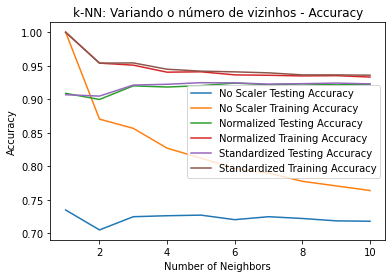

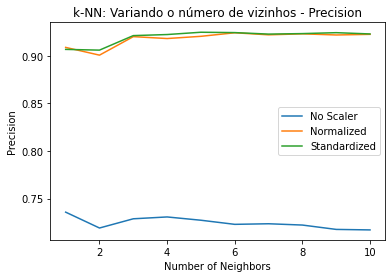

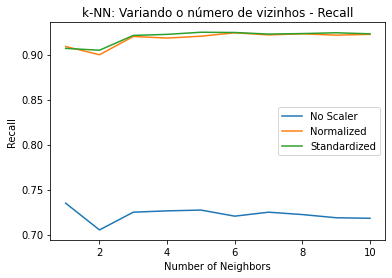

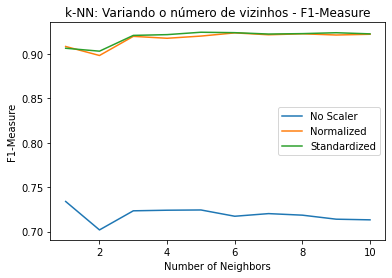

In [68]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Measure']
scalers = ['No Scaler', 'Normalized', 'Standardized']

for metric in metrics:    
    for scaler in scalers:
        if metric == 'Accuracy':
            train_accuracy = resultadoskNN.loc[(resultadoskNN['Scaler']) == scaler, 'Train accuracy']
            test_accuracy = resultadoskNN.loc[(resultadoskNN['Scaler']) == scaler, 'Test accuracy']    
            plt.plot(array_k, test_accuracy, label = f'{scaler} Testing Accuracy')
            plt.plot(array_k, train_accuracy, label = f'{scaler} Training Accuracy')
        else:
            values_metric = resultadoskNN.loc[(resultadoskNN['Scaler']) == scaler, metric]
            plt.plot(array_k, values_metric, label = f'{scaler}')
            
    
    plt.title(f'k-NN: Variando o número de vizinhos - {metric}')    
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.ylabel(metric)
    plt.show()

### Exibição dos resultados obtidos para os outros modelos de classificadores utilizados

In [69]:
resultados_novos_modelos = pd.DataFrame(results_otherModels)
resultados_novos_modelos.sort_values(by='Test accuracy', ascending=False)

,Model,Scaler,Train accuracy,Test accuracy,Precision,Recall,F1-Measure
11,SVC,Standardized,0.932112,0.929474,0.929421,0.929474,0.929359
3,RF,No Scaler,0.999902,0.923009,0.923033,0.923009,0.922904
6,SVC,Normalized,0.925255,0.922715,0.922935,0.922715,0.922698
8,RF,Normalized,1.000000,0.922421,0.922309,0.922421,0.922222
13,RF,Standardized,0.999902,0.920658,0.920624,0.920658,0.920553
14,SGD,Standardized,0.916242,0.912724,0.913929,0.912724,0.913006
9,SGD,Normalized,0.911442,0.905084,0.906324,0.905084,0.905167
10,DTC,Standardized,1.000000,0.897150,0.896735,0.897150,0.896840
7,NB,Normalized,0.897531,0.895093,0.896420,0.895093,0.894914
12,NB,Standardized,0.897531,0.895093,0.896420,0.895093,0.894914


### Combinando e exibindo os melhores resultados obtidos com os outros modelos e com o kNN.

In [70]:
result_knn = resultadoskNN.sort_values(by='Test accuracy', ascending=False).head(5)
result_models = resultados_novos_modelos.sort_values(by='Test accuracy', ascending=False).head(5)
resultados_total = pd.concat([result_knn, result_models])
resultados_total.sort_values(by='Test accuracy', ascending=False)

,Model,Scaler,Train accuracy,Test accuracy,Precision,Recall,F1-Measure
11,SVC,Standardized,0.932112,0.929474,0.929421,0.929474,0.929359
24,kNN(k = 5),Standardized,0.942006,0.924772,0.924644,0.924772,0.924634
25,kNN(k = 6),Standardized,0.940929,0.924478,0.924269,0.924478,0.924149
15,kNN(k = 6),Normalized,0.936422,0.924185,0.924087,0.924185,0.923909
28,kNN(k = 9),Standardized,0.936422,0.924185,0.924193,0.924185,0.924085
27,kNN(k = 8),Standardized,0.936422,0.923303,0.923223,0.923303,0.923076
3,RF,No Scaler,0.999902,0.923009,0.923033,0.923009,0.922904
6,SVC,Normalized,0.925255,0.922715,0.922935,0.922715,0.922698
8,RF,Normalized,1.000000,0.922421,0.922309,0.922421,0.922222
13,RF,Standardized,0.999902,0.920658,0.920624,0.920658,0.920553


### Selecionando os melhores modelos de kNN para cada escalonamento 

In [71]:
scalers = ['No Scaler', 'Normalized', 'Standardized']
knns = []
for scaler in scalers:
    res = resultadoskNN.loc[(resultadoskNN['Scaler']) == scaler, ]
    ordered = res.sort_values(by='Test accuracy', ascending=False)
    row = ordered.iloc[0, :]
    knns.append(row)
result_knn = pd.DataFrame(knns)
result_knn

,Model,Scaler,Train accuracy,Test accuracy,Precision,Recall,F1-Measure
0,kNN(k = 1),No Scaler,1.000000,0.734940,0.735673,0.734940,0.734002
15,kNN(k = 6),Normalized,0.936422,0.924185,0.924087,0.924185,0.923909
24,kNN(k = 5),Standardized,0.942006,0.924772,0.924644,0.924772,0.924634


### Concatenando o dataframe acima com o dataframe dos resultados dos outros modelos diferentes do kNN

In [72]:
resultados_total = pd.concat([resultados_novos_modelos, result_knn])
resultados_total

,Model,Scaler,Train accuracy,Test accuracy,Precision,Recall,F1-Measure
0,DTC,No Scaler,1.000000,0.892742,0.892354,0.892742,0.892451
1,SVC,No Scaler,0.633229,0.640024,0.598119,0.640024,0.598564
2,NB,No Scaler,0.762147,0.770203,0.769661,0.770203,0.766897
3,RF,No Scaler,0.999902,0.923009,0.923033,0.923009,0.922904
4,SGD,No Scaler,0.434855,0.434910,0.517829,0.434910,0.390552
5,DTC,Normalized,1.000000,0.894799,0.894523,0.894799,0.894611
6,SVC,Normalized,0.925255,0.922715,0.922935,0.922715,0.922698
7,NB,Normalized,0.897531,0.895093,0.896420,0.895093,0.894914
8,RF,Normalized,1.000000,0.922421,0.922309,0.922421,0.922222
9,SGD,Normalized,0.911442,0.905084,0.906324,0.905084,0.905167


### Exibindo um gráfico de barras com a comparação das acurácias obtidas para cada modelo utilizado nesse problema

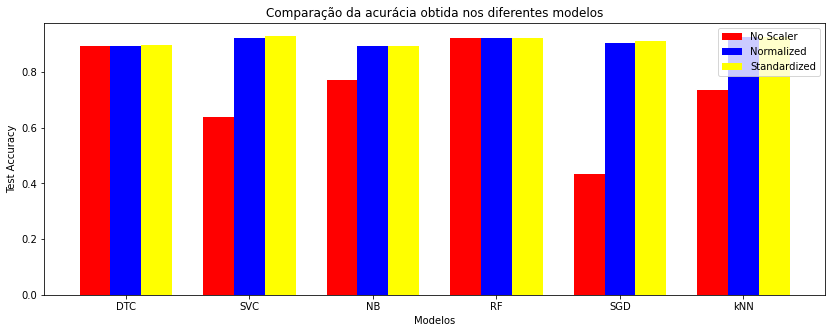

In [73]:
array_noScaler = resultados_total.loc[(resultados_total['Scaler']) == 'No Scaler', 'Test accuracy']
array_norm = resultados_total.loc[(resultados_total['Scaler']) == 'Normalized', 'Test accuracy']
array_std = resultados_total.loc[(resultados_total['Scaler']) == 'Standardized', 'Test accuracy']

models = ['DTC', 'SVC', 'NB', 'RF', 'SGD', 'kNN']

plt.figure(figsize = (14, 5))

barWidth = 0.25

p1 = np.arange(len(array_noScaler))
p2 = [p + barWidth for p in p1]
p3 = [p + barWidth for p in p2]


plt.bar(p1, array_noScaler, color='red', width=barWidth, label='No Scaler')
plt.bar(p2, array_norm, color='blue', width=barWidth, label='Normalized')
plt.bar(p3, array_std, color='yellow', width=barWidth, label='Standardized')


plt.legend()
plt.xlabel('Modelos')
plt.ylabel('Test Accuracy')
plt.title('Comparação da acurácia obtida nos diferentes modelos')
plt.xticks(p2, models)
plt.show()
